<a href="https://colab.research.google.com/github/rtajeong/M1_2025/blob/main/Ch5_DataProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 결측치 처리

- 확인

In [1]:
import pandas as pd
import numpy as np     # NaN 값을 사용하기 위해 numpy 임포트

# 예제 데이터프레임 생성
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [6, np.nan, 8, 9, 10],
    'C': [11, 12, 13, np.nan, 15],
    'D': [16, 17, 18, 19, 20]
}
df = pd.DataFrame(data)

print("--- 원본 데이터프레임 ---")
df


--- 원본 데이터프레임 ---


,A,B,C,D
0,1.0,6.0,11.0,16
1,2.0,NaN,12.0,17
2,NaN,8.0,13.0,18
3,4.0,9.0,NaN,19
4,5.0,10.0,15.0,20


In [2]:
# 1. isna() 또는 isnull() 사용: 각 요소가 결측치인지 여부를 True/False로 반환
print("--- isna() 결과 (True: 결측치) ---")
print(df.isna())

--- isna() 결과 (True: 결측치) ---
       A      B      C      D
0  False  False  False  False
1  False   True  False  False
2   True  False  False  False
3  False  False   True  False
4  False  False  False  False


In [3]:
# 2. 결측치 개수 확인 (컬럼별)
print("--- 컬럼별 결측치 개수 ---")
print(df.isna().sum()) # True는 1, False는 0으로 간주하여 합산


--- 컬럼별 결측치 개수 ---
A    1
B    1
C    1
D    0
dtype: int64


In [6]:
# 3. 전체 데이터프레임의 결측치 총 개수
print("--- 전체 결측치 총 개수 ---")
print(df.isna().sum().sum())


--- 전체 결측치 총 개수 ---
3


In [7]:
# 4. 결측치가 있는 행만 확인
print("--- 결측치가 있는 행 ---")
print(df[df.isna().any(axis=1)]) # axis=1은 행 방향으로 True가 하나라도 있는지 확인


--- 결측치가 있는 행 ---
     A    B     C   D
1  2.0  NaN  12.0  17
2  NaN  8.0  13.0  18
3  4.0  9.0   NaN  19


In [8]:
# 5. 결측치가 있는 컬럼만 확인
print("--- 결측치가 있는 컬럼 ---")
print(df.loc[:, df.isna().any(axis=0)]) # axis=0은 컬럼 방향으로 True가 하나라도 있는지 확인

--- 결측치가 있는 컬럼 ---
     A     B     C
0  1.0   6.0  11.0
1  2.0   NaN  12.0
2  NaN   8.0  13.0
3  4.0   9.0   NaN
4  5.0  10.0  15.0


In [9]:
# 6. 결측치 비율 확인 (컬럼별)
print("--- 컬럼별 결측치 비율 ---")
print(df.isna().sum() / len(df))

--- 컬럼별 결측치 비율 ---
A    0.2
B    0.2
C    0.2
D    0.0
dtype: float64


- 제거

In [10]:
df

,A,B,C,D
0,1.0,6.0,11.0,16
1,2.0,NaN,12.0,17
2,NaN,8.0,13.0,18
3,4.0,9.0,NaN,19
4,5.0,10.0,15.0,20


In [11]:
# 1. 결측치가 있는 행 제거
df_dropped_rows = df.dropna(axis=0) # 또는 df.dropna()
print("--- 결측치가 있는 행 제거 후 ---")
print(df_dropped_rows)
print("\n")

# 2. 결측치가 있는 컬럼 제거
df_dropped_cols = df.dropna(axis=1)
print("--- 결측치가 있는 컬럼 제거 후 ---")
print(df_dropped_cols)


--- 결측치가 있는 행 제거 후 ---
     A     B     C   D
0  1.0   6.0  11.0  16
4  5.0  10.0  15.0  20


--- 결측치가 있는 컬럼 제거 후 ---
    D
0  16
1  17
2  18
3  19
4  20


In [12]:
# 3. 특정 컬럼에 결측치가 있는 경우에만 행 제거
df_dropped_subset = df.dropna(subset=['A', 'B'])
print("--- 'A' 또는 'B' 컬럼에 결측치가 있는 행 제거 후 ---")
print(df_dropped_subset)


--- 'A' 또는 'B' 컬럼에 결측치가 있는 행 제거 후 ---
     A     B     C   D
0  1.0   6.0  11.0  16
3  4.0   9.0   NaN  19
4  5.0  10.0  15.0  20


In [13]:
# 4. 모든 값이 NaN인 행/컬럼만 제거 (how='all')
# 예시를 위해 모든 값이 NaN인 행/컬럼 추가
df_all_nan = df.copy()
df_all_nan.loc[5] = np.nan # 모든 값이 NaN인 행 추가
df_all_nan['E'] = np.nan   # 모든 값이 NaN인 컬럼 추가
print("--- 모든 값이 NaN인 행/컬럼 추가된 데이터프레임 ---")
print(df_all_nan)
print("\n")

df_dropped_all_nan_rows = df_all_nan.dropna(how='all', axis=0)
print("--- 모든 값이 NaN인 행 제거 후 ---")
print(df_dropped_all_nan_rows)
print("\n")

df_dropped_all_nan_cols = df_all_nan.dropna(how='all', axis=1)
print("--- 모든 값이 NaN인 컬럼 제거 후 ---")
print(df_dropped_all_nan_cols)
print("\n")

--- 모든 값이 NaN인 행/컬럼 추가된 데이터프레임 ---
     A     B     C     D   E
0  1.0   6.0  11.0  16.0 NaN
1  2.0   NaN  12.0  17.0 NaN
2  NaN   8.0  13.0  18.0 NaN
3  4.0   9.0   NaN  19.0 NaN
4  5.0  10.0  15.0  20.0 NaN
5  NaN   NaN   NaN   NaN NaN


--- 모든 값이 NaN인 행 제거 후 ---
     A     B     C     D   E
0  1.0   6.0  11.0  16.0 NaN
1  2.0   NaN  12.0  17.0 NaN
2  NaN   8.0  13.0  18.0 NaN
3  4.0   9.0   NaN  19.0 NaN
4  5.0  10.0  15.0  20.0 NaN


--- 모든 값이 NaN인 컬럼 제거 후 ---
     A     B     C     D
0  1.0   6.0  11.0  16.0
1  2.0   NaN  12.0  17.0
2  NaN   8.0  13.0  18.0
3  4.0   9.0   NaN  19.0
4  5.0  10.0  15.0  20.0
5  NaN   NaN   NaN   NaN




- 대치

In [14]:
df

,A,B,C,D
0,1.0,6.0,11.0,16
1,2.0,NaN,12.0,17
2,NaN,8.0,13.0,18
3,4.0,9.0,NaN,19
4,5.0,10.0,15.0,20


In [15]:
# 1. 특정 값으로 대치 (예: 0 또는 고정된 값)
df_filled_zero = df.fillna(0)
print("--- 0으로 결측치 대치 후 ---")
print(df_filled_zero)
print("\n")

# 2. 컬럼의 평균값으로 대치 (연속형 데이터에 적합)
df_filled_mean = df.fillna(df.mean(numeric_only=True)) # numeric_only=True: 숫자 컬럼만 대상으로
print("--- 평균값으로 결측치 대치 후 ---")
print(df_filled_mean)
print("\n")

# 3. 컬럼의 중앙값으로 대치 (이상치에 덜 민감)
df_filled_median = df.fillna(df.median(numeric_only=True))
print("--- 중앙값으로 결측치 대치 후 ---")
print(df_filled_median)
print("\n")

# 4. 컬럼의 최빈값으로 대치 (범주형 데이터에 적합)
# 예시를 위해 'C' 컬럼을 범주형으로 가정하고 최빈값으로 대치
# (실제 최빈값은 mode()[0]으로 접근)
df_filled_mode = df.copy()
df_filled_mode['C'] = df_filled_mode['C'].fillna(df_filled_mode['C'].mode()[0])
print("--- 최빈값으로 'C' 컬럼 결측치 대치 후 ---")
print(df_filled_mode)
print("\n")


--- 0으로 결측치 대치 후 ---
     A     B     C   D
0  1.0   6.0  11.0  16
1  2.0   0.0  12.0  17
2  0.0   8.0  13.0  18
3  4.0   9.0   0.0  19
4  5.0  10.0  15.0  20


--- 평균값으로 결측치 대치 후 ---
     A      B      C   D
0  1.0   6.00  11.00  16
1  2.0   8.25  12.00  17
2  3.0   8.00  13.00  18
3  4.0   9.00  12.75  19
4  5.0  10.00  15.00  20


--- 중앙값으로 결측치 대치 후 ---
     A     B     C   D
0  1.0   6.0  11.0  16
1  2.0   8.5  12.0  17
2  3.0   8.0  13.0  18
3  4.0   9.0  12.5  19
4  5.0  10.0  15.0  20


--- 최빈값으로 'C' 컬럼 결측치 대치 후 ---
     A     B     C   D
0  1.0   6.0  11.0  16
1  2.0   NaN  12.0  17
2  NaN   8.0  13.0  18
3  4.0   9.0  11.0  19
4  5.0  10.0  15.0  20




In [16]:
# 5. 이전 값 또는 다음 값으로 대치 (시계열 데이터에 유용)
# ffill(): forward fill, 이전 값으로 채움

# df_filled_ffill = df.fillna(method='ffill')
df_filled_ffill = df.ffill()
print("--- 이전 값으로 결측치 대치 후 (ffill) ---")
print(df_filled_ffill)
print("\n")

# bfill(): backward fill, 다음 값으로 채움
# df_filled_bfill = df.fillna(method='bfill')
df_filled_bfill = df.bfill()
print("--- 다음 값으로 결측치 대치 후 (bfill) ---")
print(df_filled_bfill)
print("\n")

--- 이전 값으로 결측치 대치 후 (ffill) ---
     A     B     C   D
0  1.0   6.0  11.0  16
1  2.0   6.0  12.0  17
2  2.0   8.0  13.0  18
3  4.0   9.0  13.0  19
4  5.0  10.0  15.0  20


--- 다음 값으로 결측치 대치 후 (bfill) ---
     A     B     C   D
0  1.0   6.0  11.0  16
1  2.0   8.0  12.0  17
2  4.0   8.0  13.0  18
3  4.0   9.0  15.0  19
4  5.0  10.0  15.0  20




- 6. 예측 모델을 이용한 대치 (더 복잡하지만 정확도 높음)
  - 결측치가 있는 특성을 예측하는 별도의 머신러닝 모델을 만들어 대치하는 방법
  - 결측치가 있는 특성을 종속 변수로, 다른 특성들을 독립 변수로 사용하여 모델을 학습시키고 예측한다.
  - 이는 데이터의 패턴을 고려하여 더 정확한 값을 채울 수 있지만, 구현이 복잡하다.
  - 예: sklearn.impute.KNNImputer, sklearn.impute.IterativeImputer 등


## 이상치 (Outlier)

- IQR 사용

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 예시 데이터 생성
data = {'score': [78, 85, 92, 88, 76, 95, 65, 99, 100, 72, 170]}
df = pd.DataFrame(data)

# IQR 계산
Q1 = df['score'].quantile(0.25)
Q3 = df['score'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 식별
outliers = df[(df['score'] < lower_bound) | (df['score'] > upper_bound)]
print(f'Q1: {Q1} and Q3: {Q3} --> IQR: {IQR}')

print("이상치 경계:", lower_bound, "~", upper_bound)
print("찾아낸 이상치:\n", outliers)


Q1: 77.0 and Q3: 97.0 --> IQR: 20.0
이상치 경계: 47.0 ~ 127.0
찾아낸 이상치:
     score
10    170


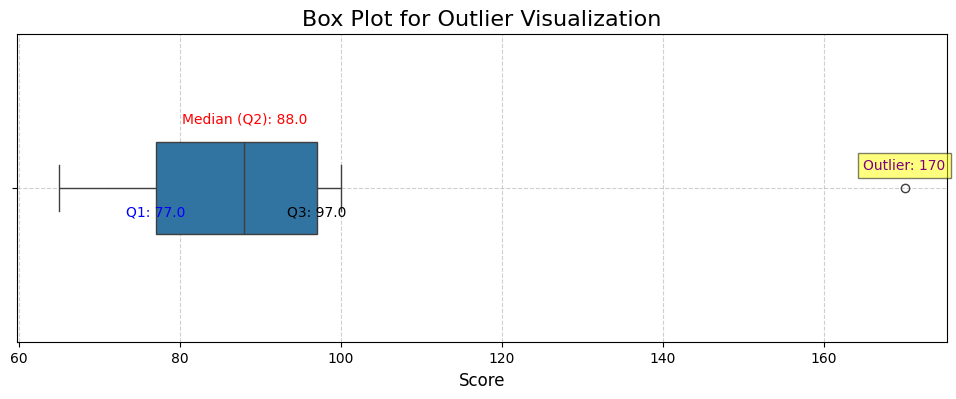

In [29]:
# 통계값 계산 for annotations
median = df['score'].median()
# Assuming there is only one outlier for annotation purposes
outlier_value_for_annotation = outliers['score'].iloc[0] if not outliers.empty else None

plt.figure(figsize=(12, 4))
sns.boxplot(x='score', data=df, width=0.3)
plt.title('Box Plot for Outlier Visualization', fontsize=16)
plt.xlabel('Score', fontsize=12)
plt.text(Q1, 0.1, f'Q1: {Q1}', ha='center', va='bottom', fontsize=10, color='blue')
plt.text(median, -0.2, f'Median (Q2): {median}', ha='center', va='bottom', fontsize=10, color='red')
plt.text(Q3, 0.1, f'Q3: {Q3}', ha='center', va='bottom', fontsize=10, color='black')

# Fix: Extract the outlier value from the DataFrame and convert it to a string for the text
if outlier_value_for_annotation is not None:
   plt.text(outlier_value_for_annotation, -0.05, f'Outlier: {outlier_value_for_annotation}', ha='center', va='bottom',
            fontsize=10, color='purple', bbox=dict(facecolor='yellow', alpha=0.5))

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

- Z-score 이용
  - Pandas 함수 df.std() 는 표본 표준편차를 계산하고 (즉, n-1 로 나눈다) Scikit-learn의 StandardScaler()는 모 표준편차를 계산 (즉, n 으로 나눈다)한다.
  - 일반적으로 통계적 분석이나 데이터 리포팅 시에는 표본 표준편차(n-1)를 주로 사용하고, 머신러닝 전처리 파이프라인에서는 StandardScaler()를 사용하는 것이 표준이다.
  - df.std(ddof=0) 을 사용하면 Scikit-learn과 동일하게 모 표준편차를 계산.

In [48]:
from sklearn.preprocessing import StandardScaler, RobustScaler
# 데이터
data = {'score': [78, 85, 92, 88, 76, 95, 65, 99, 80, 72, 430]}
df = pd.DataFrame(data)

# Z-score 계산
df['z_score'] = (df['score'] - df['score'].mean()) / df['score'].std(ddof=1)

# StandardScaler 함수 이용
scaler = StandardScaler()
df['scaled_score'] = scaler.fit_transform(df[['score']]) # ddof=0 사용

# Robust scaler
robust = RobustScaler()
df['robust_scaled_score'] = robust.fit_transform(df[['score']])

# 이상치 식별 (절대값이 3 이상인 경우)
outliers_z = df[np.abs(df['z_score']) > 3]
print("Z-score 기반 이상치:\n", outliers_z)


Z-score 기반 이상치:
     score   z_score  scaled_score  robust_scaled_score
10    430  3.000919       3.14739            20.909091


In [49]:
df

,score,z_score,scaled_score,robust_scaled_score
0,78,-0.347657,-0.364626,-0.424242
1,85,-0.281066,-0.294784,0.000000
2,92,-0.214475,-0.224943,0.424242
3,88,-0.252527,-0.264852,0.181818
4,76,-0.366683,-0.384580,-0.545455
5,95,-0.185936,-0.195011,0.606061
6,65,-0.471326,-0.494331,-1.212121
7,99,-0.147884,-0.155102,0.848485
8,80,-0.328631,-0.344671,-0.303030
9,72,-0.404735,-0.424489,-0.787879


In [50]:
df.mean()

,0
score,114.545455
z_score,0.000000
scaled_score,0.000000
robust_scaled_score,1.790634


## 데이터 타입 확인 및 변경

In [51]:
import pandas as pd
import numpy as np

# 예시 데이터프레임 생성
df_info = pd.DataFrame({
    'ID': [101, 102, 103, 104],
    'Purchase_Date': ['2025-07-15', '2025-07-15', '2025-07-16', '2025-07-16'],
    'Price': ['5,000', '12,000', '7,500', '3,200'],
    'Rating': ['4.5', '3.8', '5.0', np.nan] # 문자열로 된 숫자와 결측치
})

# 데이터 타입 확인
print("\n===== 데이터 타입 변경 전 =====")
df_info.info()


===== 데이터 타입 변경 전 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             4 non-null      int64 
 1   Purchase_Date  4 non-null      object
 2   Price          4 non-null      object
 3   Rating         3 non-null      object
dtypes: int64(1), object(3)
memory usage: 260.0+ bytes


In [52]:
df_info

,ID,Purchase_Date,Price,Rating
0,101,2025-07-15,"5,000",4.5
1,102,2025-07-15,"12,000",3.8
2,103,2025-07-16,"7,500",5.0
3,104,2025-07-16,"3,200",NaN


In [53]:
# 'Price' 열의 쉼표를 제거하고 숫자(int) 타입으로 변경
df_info['Price'] = df_info['Price'].str.replace(',', '').astype(int)

# 'Rating' 열을 숫자(float) 타입으로 변경
df_info['Rating'] = df_info['Rating'].astype(float)

# 'Purchase_Date' 열을 날짜(datetime) 타입으로 변경
df_info['Purchase_Date'] = pd.to_datetime(df_info['Purchase_Date'])

# 변경 후 데이터 타입 재확인
print("\n===== 데이터 타입 변경 후 =====")
df_info.info()


===== 데이터 타입 변경 후 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             4 non-null      int64         
 1   Purchase_Date  4 non-null      datetime64[ns]
 2   Price          4 non-null      int64         
 3   Rating         3 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 260.0 bytes


In [54]:
df_info['Purchase_Date'].dt.year   # month, day, hour, min, second 도 가능

,Purchase_Date
0,2025
1,2025
2,2025
3,2025


In [55]:
df_info['Purchase_Date'].dt.dayofweek # 1 은 월요일

,Purchase_Date
0,1
1,1
2,2
3,2


## 불필요한 특성 제거 및 선택

In [56]:
# 'ID' 열은 분석에 불필요하므로 제거
df_final = df_info.drop(columns=['ID'])
print("\n===== 'ID' 열 제거 후 데이터 =====")
print(df_final.head())

# 'Purchase_Date'와 'Price' 정보만 필요할 경우
df_subset = df_final[['Purchase_Date', 'Price']]
print("\n===== 필요한 특성만 선택한 데이터 =====")
print(df_subset.head())


===== 'ID' 열 제거 후 데이터 =====
  Purchase_Date  Price  Rating
0    2025-07-15   5000     4.5
1    2025-07-15  12000     3.8
2    2025-07-16   7500     5.0
3    2025-07-16   3200     NaN

===== 필요한 특성만 선택한 데이터 =====
  Purchase_Date  Price
0    2025-07-15   5000
1    2025-07-15  12000
2    2025-07-16   7500
3    2025-07-16   3200


# 데이터 시각화

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'day': [1, 2, 3, 4, 5, 6, 7],
    'temperature': [25.1, 24.8, 26.0, 26.5, 25.9, 27.1, 26.8],
    'sales': [120, 115, 135, 145, 130, 160, 152]
}
df = pd.DataFrame(data)
df

,day,temperature,sales
0,1,25.1,120
1,2,24.8,115
2,3,26.0,135
3,4,26.5,145
4,5,25.9,130
5,6,27.1,160
6,7,26.8,152


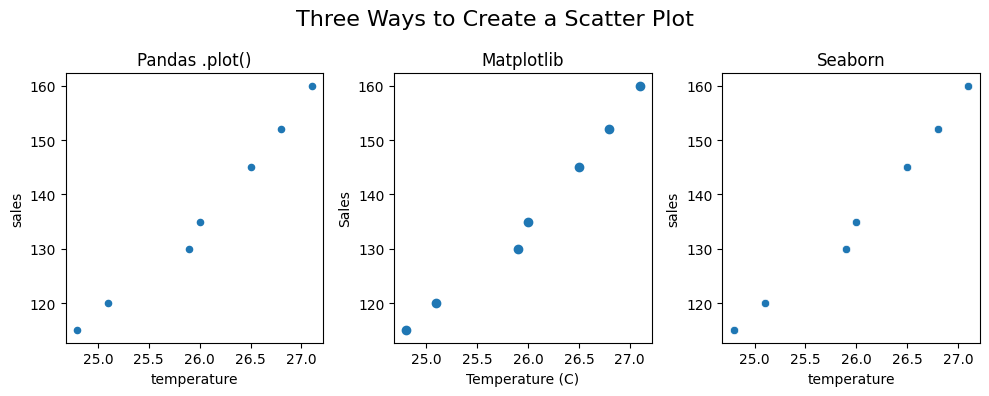

In [59]:
# 1행 3열의 서브플롯 격자 생성
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

# --- 1. Pandas .plot()을 이용한 방법 ---
df.plot(kind='scatter', x='temperature', y='sales', ax=ax[0])
ax[0].set_title('Pandas .plot()')

# --- 2. Matplotlib을 이용한 방법 ---
ax[1].scatter(df['temperature'], df['sales'])
ax[1].set_title('Matplotlib')
ax[1].set_xlabel('Temperature (C)') # Matplotlib은 축 이름을 직접 설정
ax[1].set_ylabel('Sales')

# --- 3. Seaborn을 이용한 방법 ---
sns.scatterplot(x='temperature', y='sales', data=df, ax=ax[2])
ax[2].set_title('Seaborn')

# 전체 제목 및 레이아웃 조정
plt.suptitle('Three Ways to Create a Scatter Plot', fontsize=16)
plt.tight_layout()
plt.show()

# 종합 실습

In [61]:
# 데이터 생성
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
data = np.random.normal(loc=100, scale=15, size=1000)
# 결측치와 이상치 추가
nan_values = [np.nan] * 20
outlier_values = [300, 350, -80, -90]
data = np.append(data, nan_values)
data = np.append(data, outlier_values)
np.random.shuffle(data)
df = pd.DataFrame(data, columns=['value'])
pd.concat([df.head(3), df.tail(3)])

,value
0,91.114091
1,68.988368
2,119.582182
1021,99.686476
1022,110.290772
1023,108.758923


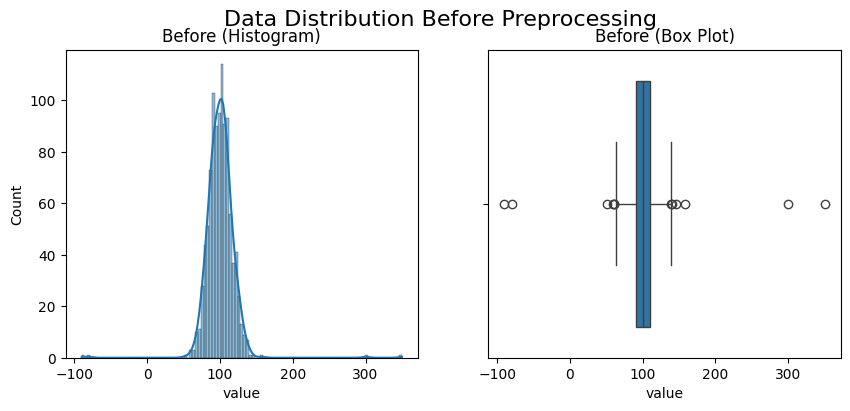

In [64]:
# 전처리 전 데이터 시각화
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(df['value'], kde=True, ax=ax[0])
ax[0].set_title('Before (Histogram)')

sns.boxplot(x=df['value'], ax=ax[1])
ax[1].set_title('Before (Box Plot)')
plt.suptitle('Data Distribution Before Preprocessing', fontsize=16)
plt.show()

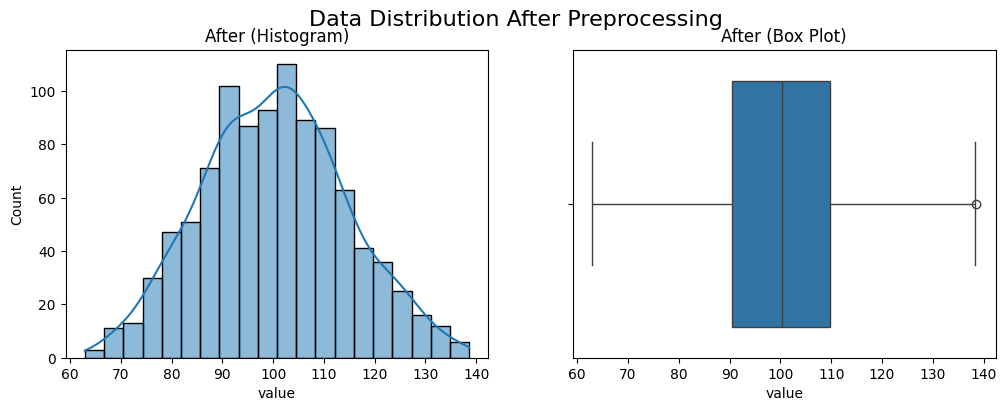

In [65]:
# 전처리 수행
df = df.dropna() # 결측치 제거

# IQR을 이용한 이상치 제거
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['value'] >= lower_bound) & (df['value'] <= upper_bound)]

# 전처리 후 데이터 시각화
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['value'], kde=True, ax=ax[0])
ax[0].set_title('After (Histogram)')
sns.boxplot(x=df['value'], ax=ax[1])
ax[1].set_title('After (Box Plot)')
plt.suptitle('Data Distribution After Preprocessing', fontsize=16)
plt.show()

# Reference

## RobustScaler

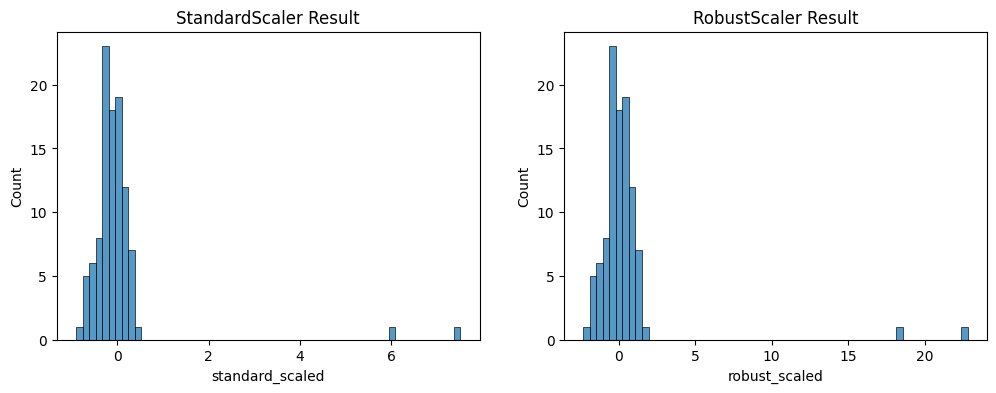

In [66]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler
import seaborn as sns
import matplotlib.pyplot as plt

# 이상치가 포함된 데이터 생성
np.random.seed(42)
data_normal = np.random.normal(50000, 10000, 100)
outliers = np.array([250000, 300000])
data_robust = np.concatenate([data_normal, outliers])
df_robust = pd.DataFrame(data_robust, columns=['income'])

# Scaler 적용
scaler_standard = StandardScaler()
scaler_robust = RobustScaler()
df_robust['standard_scaled'] = scaler_standard.fit_transform(df_robust[['income']])
df_robust['robust_scaled'] = scaler_robust.fit_transform(df_robust[['income']])

# 시각화
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df_robust['standard_scaled'], ax=ax[0], kde=False).set_title('StandardScaler Result')
sns.histplot(df_robust['robust_scaled'], ax=ax[1], kde=False).set_title('RobustScaler Result')
plt.show()

- StandardScaler (왼쪽): 두 개의 이상치 때문에 대부분의 데이터가 0 근처의 매우 좁은 범위에 빽빽하게 압축되었다. 이상치가 평균과 표준편차를 크게 왜곡시켰기 때문이다.
- RobustScaler (오른쪽): 이상치의 영향을 덜 받아, 데이터의 주요 분포가 더 넓고 고르게 퍼져 있는 것을 볼 수 있다. 이상치는 여전히 다른 값들과 멀리 떨어져 있지만, 나머지 데이터의 스케일링을 망치지는 않았다.

## Powertransformer

In [67]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer
from scipy import stats   # Box-Cox를 위해 import
import matplotlib.pyplot as plt
import seaborn as sns

# 오른쪽으로 치우친 데이터 생성
np.random.seed(42)
data_skewed = np.random.exponential(scale=200, size=1000)
df_transform = pd.DataFrame(data_skewed, columns=['price'])
# Box-Cox와 Log는 양수 데이터에만 적용 가능
df_transform['price'] = df_transform['price'].replace(0, 0.001)


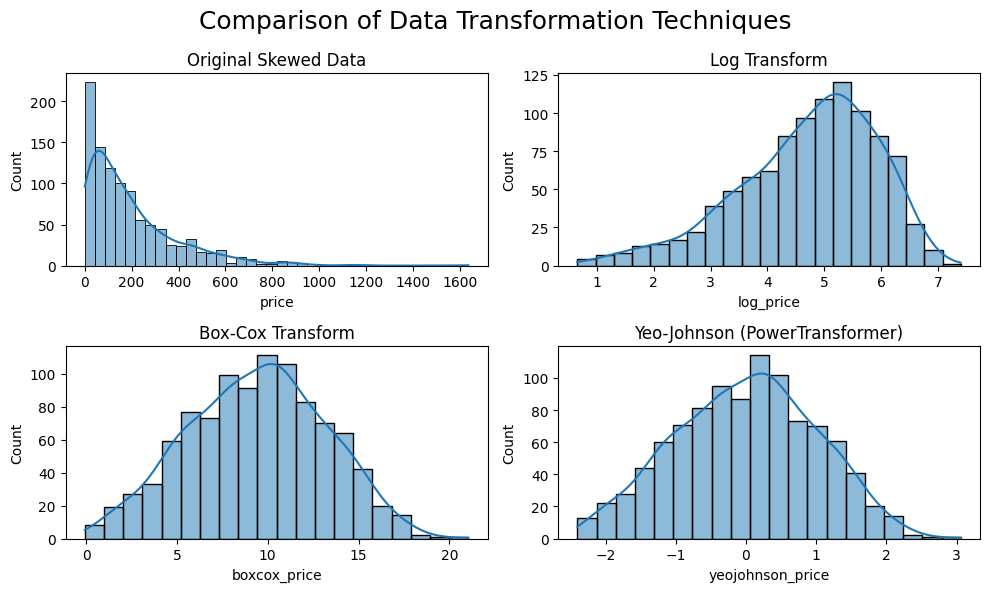

In [68]:
# 1. Log Transform (log(1+x)로 계산하여 0에 대한 에러 방지)
df_transform['log_price'] = np.log1p(df_transform['price'])

# 2. Box-Cox Transform
# 최적의 lambda를 찾아 변환된 데이터와 함께 반환
boxcox_data, _ = stats.boxcox(df_transform['price'])
df_transform['boxcox_price'] = boxcox_data

# 3. Yeo-Johnson Transform (PowerTransformer의 기본값)
power_yj = PowerTransformer(method='yeo-johnson')
df_transform['yeojohnson_price'] = power_yj.fit_transform(df_transform[['price']])


# --- 시각화 ---
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
sns.histplot(df_transform['price'], ax=ax[0, 0], kde=True).set_title('Original Skewed Data')
sns.histplot(df_transform['log_price'], ax=ax[0, 1], kde=True).set_title('Log Transform')
sns.histplot(df_transform['boxcox_price'], ax=ax[1, 0], kde=True).set_title('Box-Cox Transform')
sns.histplot(df_transform['yeojohnson_price'], ax=ax[1, 1], kde=True).set_title('Yeo-Johnson (PowerTransformer)')

plt.suptitle('Comparison of Data Transformation Techniques', fontsize=18)
plt.tight_layout()
plt.show()

--------------------------------